# <font color = 'red' >Detecção de anomalias</font>

## <font color='Green'> Instala os pacotes </font>
- !pip install pandas
- !pip install scikit-learn
- !pip install matplotlib
- !pip install seaborn

In [17]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt



In [2]:
Caminho = r'C:\Users\david\Desktop\ESTUDOS\2-DSA\MBI_PB_DSA\ProjetosPowerBI\ProjetosPowerBI\ProjetosML\dados\dados_historicos.csv'
dados_historicos_dsa = pd.read_csv(Caminho)
print(dados_historicos_dsa.head())

   transacao1  transacao2
0   12.669211   62.587129
1   32.354746  -21.460716
2  -16.493253   33.112899
3    1.042115   60.217991
4   11.959012   59.423824


In [3]:
dados_historicos_dsa[['transacao1' , 'transacao2']].describe()

,transacao1,transacao2
count,650.000000,650.000000
mean,195.996809,75.626776
std,164.365153,94.099071
min,-189.632622,-129.689793
25%,16.762615,4.092314
50%,198.526035,30.041190
75%,382.220206,186.598493
max,456.036150,298.963511


In [71]:
# Cria o modelo de Machine Learning com algoritmo IsolationForest
modelo_ml_dsa = IsolationForest(contamination='auto', random_state=42)

# Treina o modelo
modelo_ml_dsa.fit(dados_historicos_dsa)

# Faz as previsões com o modelo usando os dados históricos
previsoes_historico = dados_historicos_dsa.copy()
previsoes_historico['anomaly_score'] = modelo_ml_dsa.decision_function(dados_historicos_dsa)
previsoes_historico['anomaly'] = modelo_ml_dsa.predict(dados_historicos_dsa)

# Ajusta as anomalias para ter 1 e -1
previsoes_historico['anomaly'] = previsoes_historico['anomaly'].apply(lambda x: 1 if x == 0 else -1)
previsoes_historico = previsoes_historico.sort_values(by='anomaly_score', ascending=False)

print(previsoes_historico.head(150))

     transacao1  transacao2  anomaly_score  anomaly
397  213.422773  194.923006       0.104028       -1
373  209.880886  198.082110       0.101770       -1
273  211.595978  197.084106       0.101727       -1
348  196.372341  191.723098       0.100939       -1
267  196.698928  192.561698       0.100507       -1
..          ...         ...            ...      ...
649  397.675141   -1.696439       0.079436       -1
104    4.535087   37.161731       0.079426       -1
298  230.264795  207.216419       0.079351       -1
480  407.372723   14.004804       0.079246       -1
128    7.289301    3.292715       0.079227       -1

[150 rows x 4 columns]


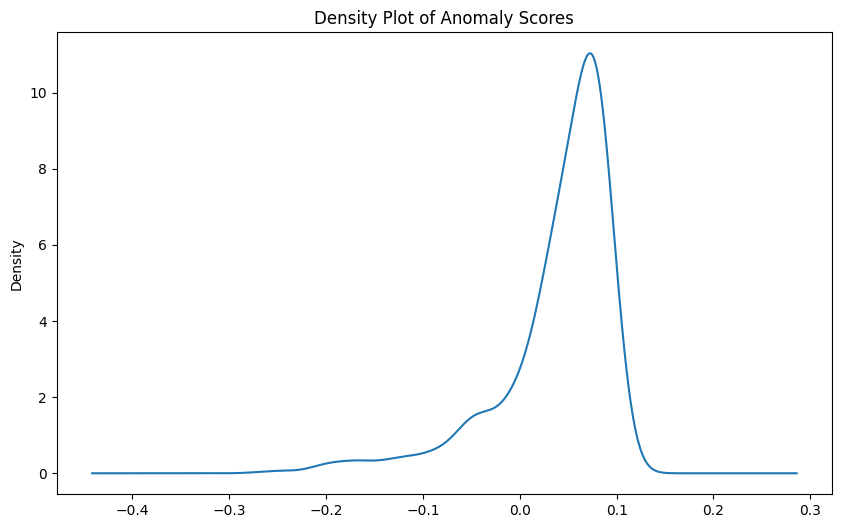

In [72]:
# Density Plot
plt.figure(figsize=(10, 6))
previsoes_historico['anomaly_score'].plot(kind='density')
plt.title('Density Plot of Anomaly Scores')
plt.show()

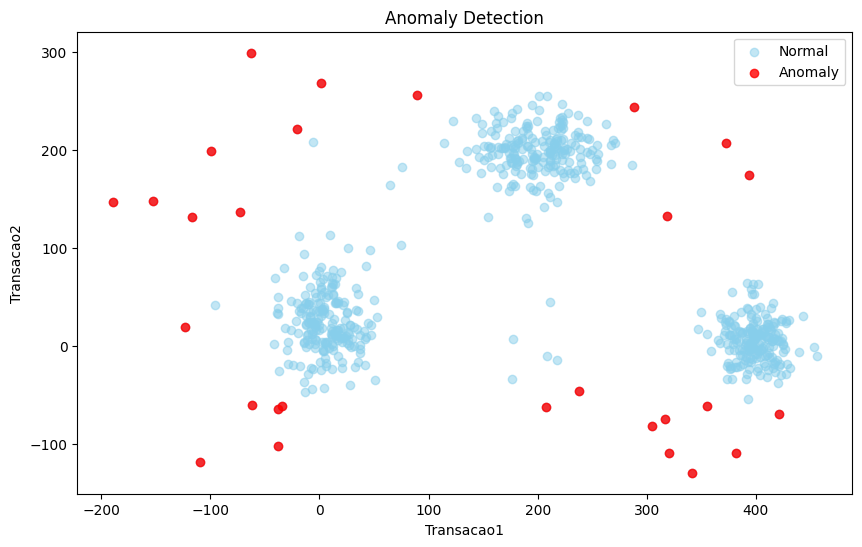

In [79]:
# Definindo a regra que anomaly score acima de 0.62 é uma anomalia
parte1 =  previsoes_historico[(previsoes_historico['anomaly_score'] <(-0.10)) | (previsoes_historico['anomaly_score'] >(0.14))]
anomalias_historico = parte1
parte2 = previsoes_historico[(previsoes_historico['anomaly_score'] <= (0.14)) | (previsoes_historico['anomaly_score'] >= (-0.10))]
normais_historico =  parte2

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(normais_historico['transacao1'], normais_historico['transacao2'], color='skyblue', alpha=0.5, label='Normal')
plt.scatter(anomalias_historico['transacao1'], anomalias_historico['transacao2'], color='red', alpha=0.8, label='Anomaly')
plt.legend()
plt.title('Anomaly Detection')
plt.xlabel('Transacao1')
plt.ylabel('Transacao2')
plt.show()

In [81]:
# Agora carregamos novos dados
caminho = r'C:\Users\david\Desktop\ESTUDOS\2-DSA\MBI_PB_DSA\ProjetosPowerBI\ProjetosPowerBI\ProjetosML\dados\novos_dados.csv'
novos_dados_dsa = pd.read_csv(caminho)
print(novos_dados_dsa.head())

# Previsões com o modelo treinado
previsoes_novos_dados = novos_dados_dsa.copy()
previsoes_novos_dados['anomaly_score'] = modelo_ml_dsa.decision_function(novos_dados_dsa)
previsoes_novos_dados['anomaly'] = modelo_ml_dsa.predict(novos_dados_dsa)

# Ajusta as anomalias para ter 1 e -1
previsoes_novos_dados['anomaly'] = previsoes_novos_dados['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Se o anomaly score é maior que 0.62 consideramos como anomalia
anomalias_novos_dados = previsoes_novos_dados[(previsoes_novos_dados['anomaly_score'] <(-0.10)) | (previsoes_novos_dados['anomaly_score'] >(0.14))]
normais_novos_dados = previsoes_novos_dados[(previsoes_novos_dados['anomaly_score'] <= (0.14)) | (previsoes_novos_dados['anomaly_score'] >= (-0.10))]


   transacao1  transacao2
0   17.976473    5.038365
1   28.783271   37.672767
2   11.975249  -28.475939
3   15.911884  -10.197377
4    5.488446    8.752535


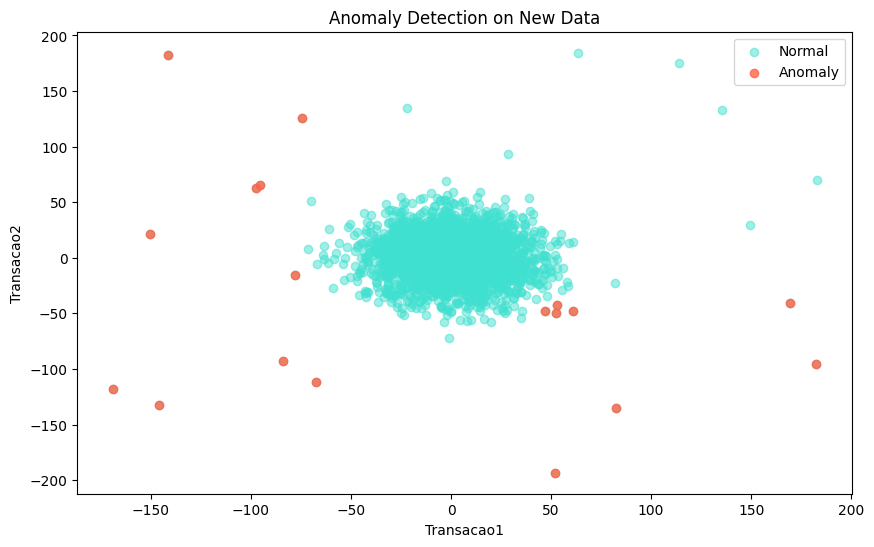

In [82]:
# Gráfico das previsões
plt.figure(figsize=(10, 6))
plt.scatter(normais_novos_dados['transacao1'], normais_novos_dados['transacao2'], color='turquoise', alpha=0.5, label='Normal')
plt.scatter(anomalias_novos_dados['transacao1'], anomalias_novos_dados['transacao2'], color='tomato', alpha=0.8, label='Anomaly')
plt.legend()
plt.title('Anomaly Detection on New Data')
plt.xlabel('Transacao1')
plt.ylabel('Transacao2')
plt.show()

In [88]:
# Arredondando a coluna 'anomaly_score' para 2 casas decimais
previsoes_novos_dados['anomaly_score'] = previsoes_novos_dados['anomaly_score'].round(2)
print(previsoes_novos_dados.head())

   transacao1  transacao2  anomaly_score  anomaly  status
0   17.976473    5.038365           0.07        0  normal
1   28.783271   37.672767           0.05        0  normal
2   11.975249  -28.475939           0.00        0  normal
3   15.911884  -10.197377           0.04        0  normal
4    5.488446    8.752535           0.08        0  normal


In [89]:
# Criando uma nova coluna com base na condição
previsoes_novos_dados['status'] = previsoes_novos_dados['anomaly_score'].apply(lambda x: 'anomalia' if (x <(-0.10) or x >(0.14)) else 'normal')

print(previsoes_novos_dados.head(350))

     transacao1  transacao2  anomaly_score  anomaly  status
0     17.976473    5.038365           0.07        0  normal
1     28.783271   37.672767           0.05        0  normal
2     11.975249  -28.475939           0.00        0  normal
3     15.911884  -10.197377           0.04        0  normal
4      5.488446    8.752535           0.08        0  normal
..          ...         ...            ...      ...     ...
345   58.363399  -25.086672          -0.05        1  normal
346  -28.094016  -33.346463          -0.05        1  normal
347  -20.166199    1.215102           0.03        0  normal
348   48.234344   -9.216352          -0.01        1  normal
349   -8.920983  -14.671391           0.03        0  normal

[350 rows x 5 columns]


<Figure size 1000x600 with 0 Axes>

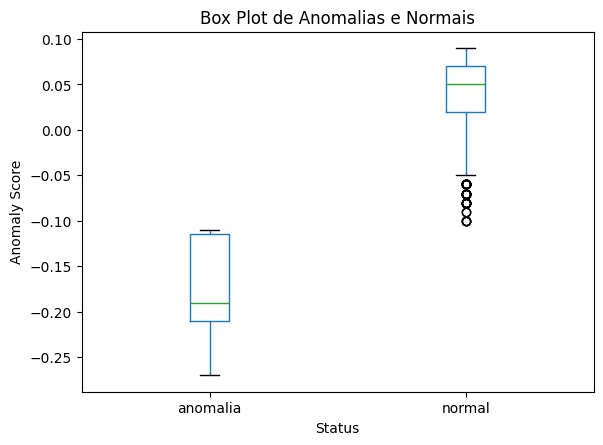

In [90]:
# Criando o box plot
plt.figure(figsize=(10, 6))
previsoes_novos_dados.boxplot(column='anomaly_score', by='status', grid=False)
plt.title('Box Plot de Anomalias e Normais')
plt.suptitle('')
plt.xlabel('Status')
plt.ylabel('Anomaly Score')
plt.show()

In [91]:
# Salva em disco
previsoes_novos_dados.to_csv("previsoes_novos_dados.csv", index=False)

#### <font color = 'yellow'>Use no power BI </font>

In [15]:
import pandas as pd
caminho = r'C:\Users\david\Desktop\ESTUDOS\2-DSA\MBI_PB_DSA\ProjetosPowerBI\ProjetosPowerBI\ProjetosML\previsoes_novos_dados.csv'
novos_dados = pd.read_csv(caminho)
